In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

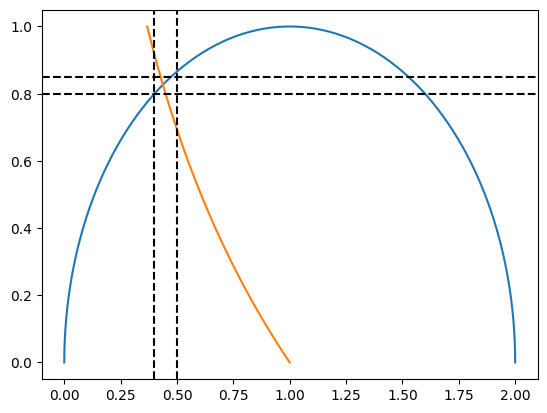

In [15]:
fig, ax = plt.subplots()
t = np.linspace(0, np.pi, 100)
ax.plot(np.cos(t)+1, np.sin(t))
y = np.linspace(0, 1, 100)
ax.plot(np.exp(-y), y)
ax.axvline(0.4, c='k', ls='--')
ax.axvline(0.5, c='k', ls='--')
ax.axhline(0.8, c='k', ls='--')
ax.axhline(0.85, c='k', ls='--')
plt.show()

$[0.4, 0.5] \times [0.8, 0.85]$

In [17]:
x, y = smp.symbols('x y')

In [18]:
f = smp.Matrix([x**2+y**2-2*x, x-smp.exp(-y)])
f

Matrix([
[x**2 - 2*x + y**2],
[      x - exp(-y)]])

In [44]:
M = f.jacobian([x,y]).inv()
fm = np.vectorize(smp.lambdify([x,y], smp.Max(M[0, 0]+M[0, 1], M[1, 0]+M[1, 1])), signature='(),()->()')

In [63]:
f.jacobian([x,y]).inv().subs([(x, 0.45), (y,0.825)])

Matrix([
[-0.205545483000877, 0.773899968699036],
[ 0.469030284060022, 0.515933312466024]])

In [36]:
1+np.exp(-0.8), 2*0.5+2*0.85-2

(1.4493289641172216, 0.7000000000000002)

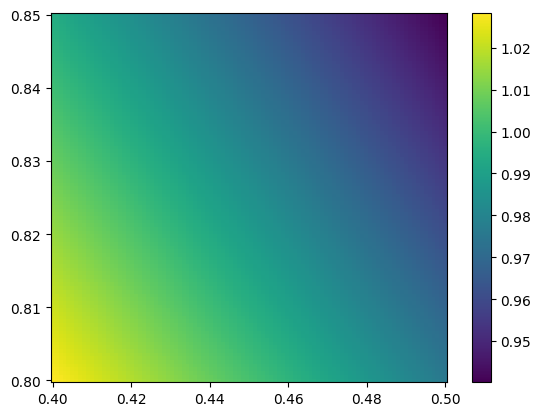

In [50]:
xv, yv = np.mgrid[0.4:0.5:100j, 0.8:0.85:100j]
plt.pcolormesh(xv, yv, fm(xv, yv))
plt.colorbar();

In [52]:
fm(0.4, 0.8)*(1+np.exp(-0.8))

1.4905252131497844

$\mu = 1.5$

In [60]:
phi = smp.Matrix([x-f[1],y-f[0]])
phi

Matrix([
[               exp(-y)],
[-x**2 + 2*x - y**2 + y]])

In [61]:
Mp = phi.jacobian([x,y])
pm = np.vectorize(smp.lambdify([x,y], smp.Max(Mp[0, 0]+Mp[0, 1], Mp[1, 0]+Mp[1, 1])), signature='(),()->()')

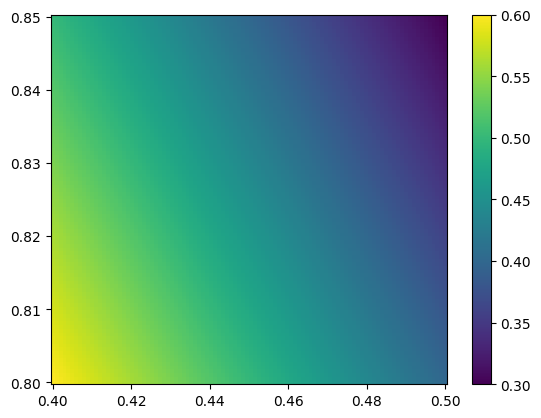

In [62]:
xv, yv = np.mgrid[0.4:0.5:100j, 0.8:0.85:100j]
plt.pcolormesh(xv, yv, pm(xv, yv))
plt.colorbar();

$q = 0.6$